# Cut x0

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120

from cut_predictor import CutPredictor

## Load a pretrained model

In [2]:
reg = CutPredictor()
reg.load_config('../../models/cut_x0.pkl')
reg.load_network('../../models/best_x0_model/')

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



## Make a prediction

Text(0, 0.5, 'deviationc')

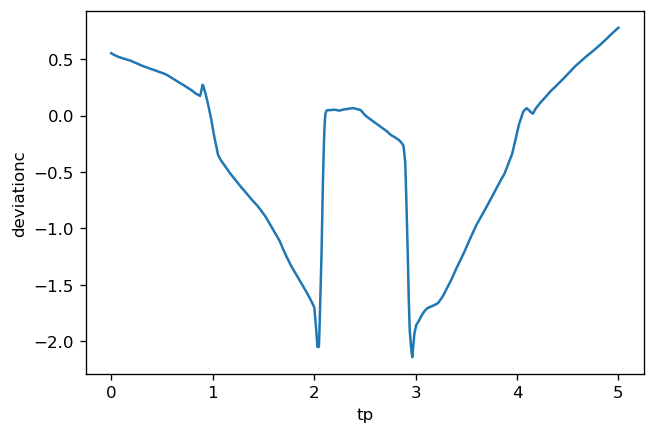

In [3]:
x, y = reg.predict({
        'Blechdicke': 1.01, 
        'Niederhalterkraft': 410.0, 
        'Ziehspalt': 2.4, 
        'Einlegeposition': -5, 
        'Ziehtiefe': 30,
        'Stempel_ID': 3,
        'E': 191.37245,
        'Rp0': 138.22696,
        'Rp50': 449.528189,
    }, 
    positions=1000)

plt.figure()
plt.plot(x, y[:, 0])
plt.xlabel('tp')
plt.ylabel('deviationc')

## Interactive visualization

In [4]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 150

def viz(x, y):
    plt.figure()
    plt.plot(x, y[:, 0])
    plt.xlabel('tp')
    plt.ylabel('deviationc')


reg.interactive(function=viz, positions=100)

interactive(children=(FloatSlider(value=1.1883700000000001, description='Blechdicke', max=1.48, min=0.99, step…

## Optimization

In [7]:
def mean_deviation(x, y):
    return y[:, 0].mean()

def max_absolute_deviation(x, y):
    return np.abs(y[:, 0]).max()

def max_deviation(x, y):
    return y[:, 0].max()

params = reg.optimize(max_deviation, positions=100, nb_trials=1000)

/Users/vitay/Applications/miniforge3/envs/tf/lib/python3.9/site-packages/optuna/progress_bar.py:47: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()
100%|██████████| 1000/1000 [00:29<00:00, 34.23it/s]

{'Blechdicke': 1.167471522695795, 'Niederhalterkraft': 382.3525982945068, 'Ziehspalt': 2.4, 'Einlegeposition': 4.996256384549652, 'Ziehtiefe': 30, 'Stempel_ID': 3}
0.10733246803283691


Text(0, 0.5, 'deviationc')

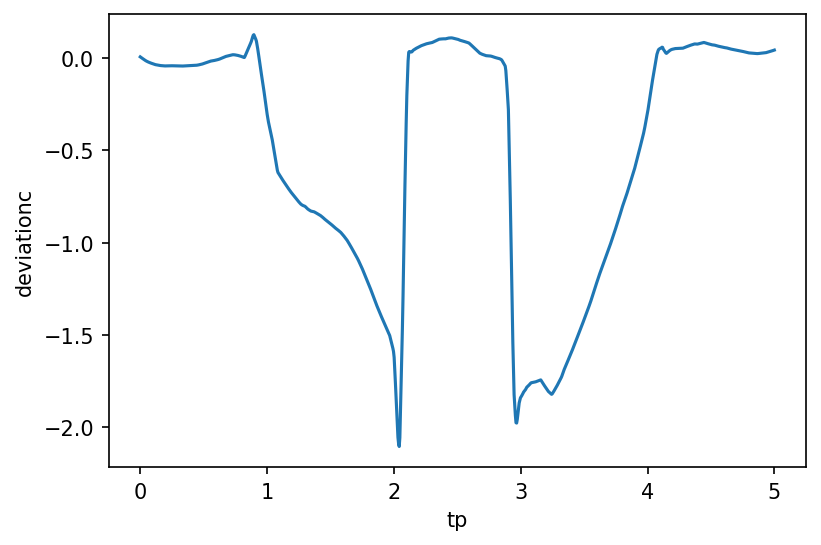

In [8]:
x, y = reg.predict(params, positions=1000)

plt.figure()
plt.plot(x, y[:, 0])
plt.xlabel('tp')
plt.ylabel('deviationc')